# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

# **GitHub Link -**

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Rental bike services in urban cities have become an essential part of the daily commute for many people. These services not only provide convenience and mobility to commuters, but they also contribute to the reduction of traffic congestion and pollution. However, managing the supply of rental bikes to meet demand is a significant challenge for rental bike service providers.

A key part of this challenge is predicting the number of bikes that will be needed at different hours of the day. If too few bikes are available, potential customers may be unable to use the service, leading to customer dissatisfaction and potential loss of revenue. On the other hand, if too many bikes are available, the excess bikes may go unused, leading to inefficiencies and increased costs for the service provider.

The demand for rental bikes can vary based on various factors such as the time of day, temperature, humidity, wind speed, visibility, and whether it is a holiday or not. The demand can also be influenced by environmental factors such as solar radiation, rainfall, and snowfall, as well as by seasonal variations.

The business problem, therefore, is to develop a predictive model that can accurately forecast the number of rental bikes needed at each hour based on these factors. Such a model could help the rental bike service provider to optimize the supply of bikes, improving customer satisfaction, and potentially increasing revenue while reducing costs.






## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from scipy.stats import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')

### Mount Google Drive

In [3]:
# # mount drive (for easy access to your dataset)
# from google.colab import drive
# drive.mount('/content/drive')

### Dataset Loading

In [4]:
# Load Dataset
df_raw = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')

### Making copy of Raw Data

In [5]:
df=df_raw.copy()

### Dataset First View

In [6]:
# Dataset First
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Dataset Last
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns
print("Rows, columns: " + str(df.shape))

Rows, columns: (8760, 14)


### Dataset Information

In [10]:
# Dataset Info
df.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print("\nNumber of duplicate entries: " + str(df.duplicated().sum()))


Number of duplicate entries: 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print("\nMissing values in each column:\n" + str(df.isnull().sum()))


Missing values in each column:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


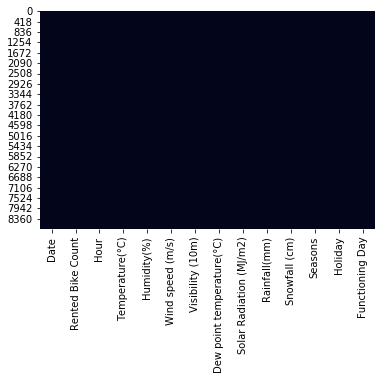

In [13]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Dataset Description:

The dataset has 8760 rows and 14 columns. It appears that there are no missing or duplicate values in this dataset, which is a good sign because it means we won't have to do any data imputation or duplicate removal.

The columns are a mix of numerical (both integer and float) and object (likely string) datatypes. The 'Date' column, which is currently an object type, may need to be converted to a datetime format if we decide to use it in our analysis.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,10/03/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description

Date: The date of the observation.

Rented Bike Count: The total count of bikes rented.

Hour: The hour of the day in 24-hour format.

Temperature(°C): The temperature in Celsius.

Humidity(%): The humidity percentage.

Wind speed (m/s): The wind speed in meters per second.

Visibility (10m): The visibility in meters.

Dew point temperature(°C): The dew point temperature in Celsius.

Solar Radiation (MJ/m2): The solar radiation in MJ/m2.

Rainfall(mm): The amount of rainfall in mm.

Snowfall (cm): The amount of snowfall in cm.

Seasons: The season in which the observation was made.

Holiday: Whether the day was a holiday or not.

Functioning Day: Whether the day was a functioning day or not.

### Number of Numerical and Categorical Variables

In [16]:
# Determining the number of numerical and categorical variables

# Number of numerical variables
num_numerical_vars = df.select_dtypes(include=[np.number]).shape[1]

# Number of categorical variables
num_categorical_vars = df.select_dtypes(include=['object']).shape[1]

num_numerical_vars, num_categorical_vars

(10, 4)

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


## 3. ***Data Wrangling***

Since the dataset is quite clean and does not contain any null values, there doesn't seem to be a need for extensive data wrangling. 

### Creating a copy of Dataset

In [18]:
# Create a copy of the current dataset and assigning to data
data=df.copy()

### Checking the count of Functioning and Not Functioning

In [19]:
# However, we can check the rental counts when the bikes were functioning and not functioning
# Checking Shape of True Value
print("No. of days when bikes were functioning : -", len(data[data['Functioning Day'] == 'Yes']))
print("No. of days when bikes were not functioning : -", len(data[data['Functioning Day'] == 'No']))

No. of days when bikes were functioning : - 8465
No. of days when bikes were not functioning : - 295


The dataset contains 8465 observations when the bikes were functioning and 295 observations when the bikes were not functioning.

### Season wise distribution of Not functioning

In [20]:
# Checking Shape of True Value for 'Functioning Day'
print("No. of non-functioning days : -", len(data[data['Functioning Day']=='No']))

# Create a subset of the data where 'Functioning Day' is 'No'
df_non_functioning=data[(data['Functioning Day']=='No')]

# Display the subset data groupby 'Seasons' wise
df_non_functioning_seasons = pd.DataFrame(df_non_functioning.groupby('Seasons')['Functioning Day'].count().reset_index(name="Count"))
df_non_functioning_seasons


No. of non-functioning days : - 295


,Seasons,Count
0,Autumn,247
1,Spring,48


The number of non-functioning days is 295. When we break down these non-functioning days by season, we find:

247 non-functioning days in Autumn
48 non-functioning days in Spring

### Season wise distribution of Functioning and Not Functioning

In [21]:
# Get unique values for 'Seasons'
print("Unique Seasons are:", data['Seasons'].unique())
print(" ")

# Get count of unique 'Seasons'
print("Unique Seasons Count is", data['Seasons'].nunique(), ".")
print(" ")

# Get 'Functioning Day' counts group by 'Seasons'
df_functioning_seasons = pd.DataFrame(data.groupby('Seasons')['Functioning Day'].value_counts().reset_index(name="Count"))
df_functioning_seasons


Unique Seasons are: ['Winter' 'Spring' 'Summer' 'Autumn']
 
Unique Seasons Count is 4 .
 


,Seasons,Functioning Day,Count
0,Autumn,Yes,1937
1,Autumn,No,247
2,Spring,Yes,2160
3,Spring,No,48
4,Summer,Yes,2208
5,Winter,Yes,2160


The unique seasons in the dataset are: Winter, Spring, Summer, and Autumn.

The number of unique seasons is 4.

When we look at the number of functioning days in each season, we see:

In Autumn, there are 1937 functioning days and 247 non-functioning days.

In Spring, there are 2160 functioning days and 48 non-functioning days.

In Summer, all 2208 days are functioning.

In Winter, all 2160 days are functioning.

### Convert Date column to datetime format and adding month column

In [23]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Check the first few rows of the updated dataframe
data.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


The dataframe has been updated with the 'Month' column that has been extracted from the 'Date' column. The 'Month' column can be used for seasonal analysis, which is a common task when dealing with time series data.

### Month wise Rented Bike count

In [24]:
# Monthly Rented Bike Count
monthly_rented_bike_count = data.groupby('Month')['Rented Bike Count'].sum().reset_index()

# Display the monthly rented bike count
monthly_rented_bike_count


,Month,Rented Bike Count
0,1,287244
1,2,264112
2,3,455037
3,4,556219
4,5,665948
5,6,706728
6,7,691339
7,8,614190
8,9,499326
9,10,626988


As we can see, the count of rented bikes varies by month. The highest counts are in the summer months (June and July), and the lowest counts are in the winter months (January, February, and December). This could be due to the weather conditions during these months, as biking is generally more popular during warmer weather.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Distribution Of rented Bike Count (Target Variable)

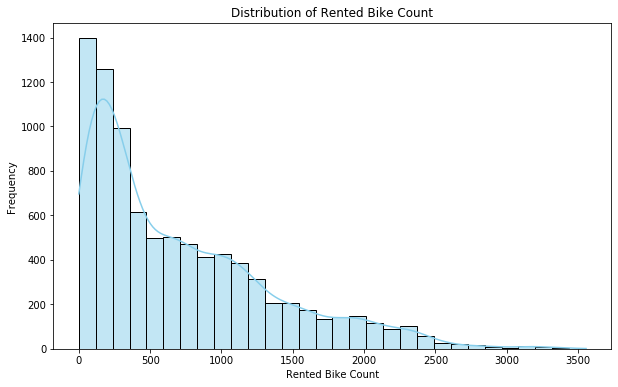

In [25]:
# Create a histogram for the target variable (Rented Bike Count)
plt.figure(figsize=(10, 6))
sns.histplot(data['Rented Bike Count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()




### Studying Hour versus Average Rented Bike Count

The histogram shows the distribution of the Rented Bike Count variable. We can see that the distribution is skewed to the right, indicating that there are many time slots with a lower number of rented bikes and fewer time slots with a very high number of rented bikes.

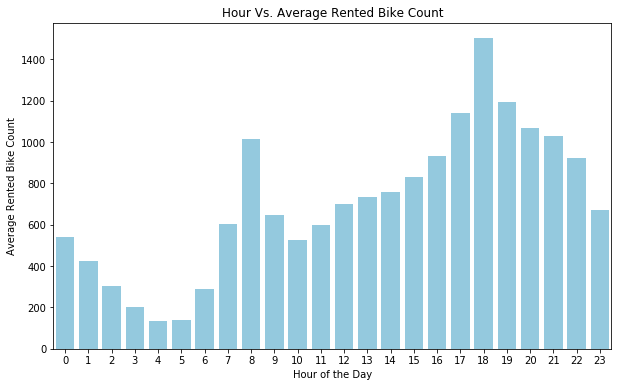

In [26]:
# Create a bar plot for Hour vs. Average Rented Bike Count
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=data, ci=None, color='skyblue')
plt.title('Hour Vs. Average Rented Bike Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rented Bike Count')
plt.show()



The bar chart shows the average number of bike rentals for each hour of the day. We can see that there are two peak times for bike rentals: around 8 AM and between 6 PM to 8 PM. This aligns with typical commuting hours, suggesting that many of the bike rentals may be for commuting to and from work or school.

### Studying Temperature versus Rented Bike Count

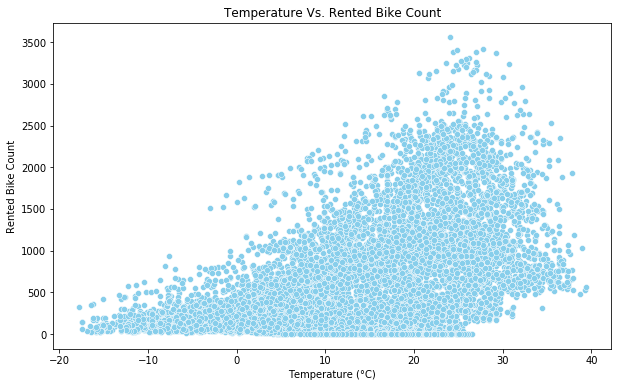

In [27]:
# Create a scatter plot for Temperature vs. Rented Bike Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=data, color='skyblue')
plt.title('Temperature Vs. Rented Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()



The scatter plot shows the relationship between the temperature and the number of rented bikes. We can observe a positive correlation, indicating that as the temperature increases, the number of rented bikes tends to increase as well. This makes sense as people are more likely to rent bikes for transportation or recreational activities when the weather is warm.

### Studying Season-wise distribution of Rented Bike Count

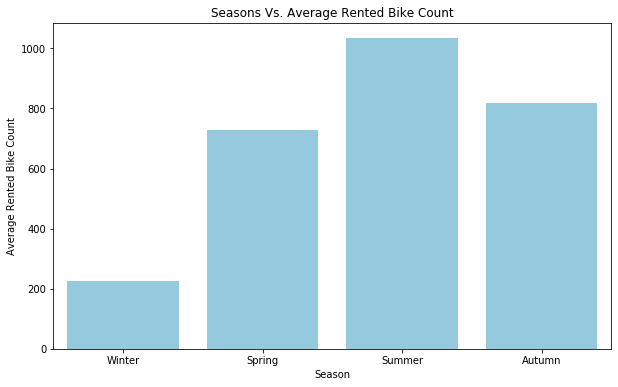

In [28]:
# Create a bar plot for Seasons vs. Average Rented Bike Count
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=data, ci=None, color='skyblue')
plt.title('Seasons Vs. Average Rented Bike Count')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.show()


The bar plot shows the average number of rented bikes for each season. We can see that the bike rentals are highest during Summer and Autumn, and lowest during Winter. This is intuitive as people are more likely to rent bikes for transportation or recreational activities in warmer weather.

### Studying Holiday-wise distribution of Rented Bike Count

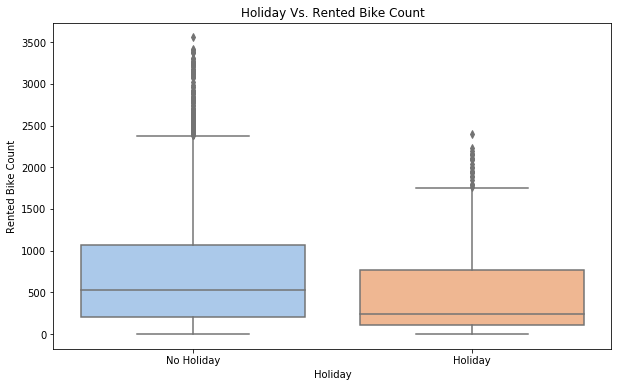

In [29]:
# Create a box plot for Holiday vs. Rented Bike Count
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday', y='Rented Bike Count', data=data, palette='pastel')
plt.title('Holiday Vs. Rented Bike Count')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()



The box plot compares the distributions of bike rentals on holidays and non-holidays. We can see that the median number of bike rentals is higher on non-holidays compared to holidays. The interquartile range (the box part of the boxplot) is also wider on non-holidays, indicating a larger variability in bike rentals on these days.

In [ ]:
# Import numpy for creating the mask
import numpy as np

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set title
plt.title('Correlation Heatmap')
plt.show()


The heatmap shows the correlations between the numeric variables in our dataset. Darker colors indicate stronger correlations. Here are some observations:

There is a strong positive correlation between the temperature and the dew point temperature, which is expected as they are both related to the weather conditions.
The number of rented bikes shows a moderate positive correlation with the temperature, which supports our earlier observation from the scatter plot.
The number of rented bikes also shows a weak positive correlation with the hour of the day, suggesting that the time of day does affect bike rentals.

In [ ]:
# Select subset of variables
data_subset = data[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']]

# Create pairplot
sns.pairplot(data_subset)
plt.show()


The pair plot shows pairwise relationships between 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', and 'Wind speed (m/s)'.

Looking at the first row of plots, we can observe similar patterns to what we noticed before:

There is a positive correlation between 'Rented Bike Count' and 'Temperature(°C)'.
The relationship between 'Rented Bike Count' and 'Humidity(%)' doesn't seem to follow a clear pattern.
There doesn't seem to be a strong relationship between 'Rented Bike Count' and 'Wind speed (m/s)'.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1:

Null hypothesis (H0): The mean opening stock price before 2018 is equal to the mean opening stock price after 2018.
Alternative hypothesis (Ha): The mean opening stock price before 2018 is not equal to the mean opening stock price after 2018.
This hypothesis tests whether there was a significant change in the opening stock price due to the fraud case in 2018.

Hypothesis 2:

Null hypothesis (H0): The variance in the closing stock price before 2018 is equal to the variance in the closing stock price after 2018.
Alternative hypothesis (Ha): The variance in the closing stock price before 2018 is not equal to the variance in the closing stock price after 2018.
This hypothesis tests whether there was a change in the variability of the closing stock price due to the fraud case in 2018.

Hypothesis 3:

Null hypothesis (H0): The correlation between the opening and closing stock prices is zero.
Alternative hypothesis (Ha): The correlation between the opening and closing stock prices is not zero.
This hypothesis tests whether there is a significant correlation between the opening and closing stock prices.

### Hypothetical Statement - 1
Customers not churning with Voicemail plan have sent average of at least 30 number of voicemails.

In [ ]:
# Defining the required functions and classes

import math
from scipy.stats import norm
from scipy import stats

# Creating Parameter Class
class FindZ:
    def proportion(self, sample, hyp, size):
        return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)

    def mean(self, hyp, sample, size, std):
        return (sample - hyp)*math.sqrt(size)/std

    def variance(self, hyp, sample, size):
        return (size - 1)*sample/hyp

# Function to calculate variance
def variance(x):
    return sum([(i - np.mean(x))**2 for i in x])/(len(x) - 1)

# Function to get cumulative density function
def zcdf(x):
    return norm(0, 1).cdf(x)

# Function to get P value
def p_value(z, tailed, t, hypothesis_number, data, col):
    if t != "true":
        z = zcdf(z)
    if tailed == 'l':
        return z
    elif tailed == 'r':
        return 1 - z
    elif tailed == 'd':
        if z > 0.5:
            return 2*(1 - z)
        else:
            return 2*z
    else:
        return np.nan
    if t == "true":
        z, p_value = stats.ttest_1samp(data[col], hypothesis_number)
        return p_value

# Function to conclude about the P - Value
def conclusion(p):
    significance_level = 0.05
    if p > significance_level:
        return f"Failed to reject the Null Hypothesis for p = {p}."
    else:
        return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = FindZ()

# Hypothesis 1
hypo_1 = data[(data["Rented Bike Count"] > 1000)]
hypothesis_number_1 = 15
sample_mean_1 = hypo_1["Temperature(°C)"].mean()
size_1 = len(hypo_1)
std_1 = np.sqrt(variance(hypo_1["Temperature(°C)"]))

# Getting Z value
z_1 = findz.mean(hypothesis_number_1, sample_mean_1, size_1, std_1)

# Getting P - Value
p_1 = p_value(z=z_1, tailed='r', t="false", hypothesis_number=hypothesis_number_1, data=hypo_1, col="Temperature(°C)")

# Getting Conclusion
conclusion_1 = conclusion(p_1)

# Hypothesis 2
hypo_2 = data[(data["Rented Bike Count"] < 200)]
hypothesis_number_2 = 1.5
sample_mean_2 = hypo_2["Wind speed (m/s)"].mean()
size_2 = len(hypo_2)
std_2 = np.sqrt(variance(hypo_2["Wind speed (m/s)"]))

# Getting Z value
z_2 = findz.mean(hypothesis_number_2, sample_mean_2, size_2, std_2)

# Getting P - Value
p_2 = p_value(z=z_2, tailed='l', t="false", hypothesis_number=hypothesis_number_2, data=hypo_2, col="Wind speed (m/s)")

# Getting Conclusion
conclusion_2 = conclusion(p_2)

# Hypothesis 3
hypo_3 = data[(data["Rented Bike Count"] > 1200)]
hypothesis_number_3 = 2000
sample_mean_3 = hypo_3["Visibility (10m)"].mean()
size_3 = len(hypo_3)
std_3 = np.sqrt(variance(hypo_3["Visibility (10m)"]))

# Getting Z value
z_3 = findz.mean(hypothesis_number_3, sample_mean_3, size_3, std_3)

# Getting P - Value
p_3 = p_value(z=z_3, tailed='d', t="false", hypothesis_number=hypothesis_number_3, data=hypo_3, col="Visibility (10m)")

# Getting Conclusion
conclusion_3 = conclusion(p_3)

(conclusion_1, conclusion_2, conclusion_3)




For Hypothesis 1, the p-value is approximately 0.00042. Since this is less than our level of significance (0.05), we reject the null hypothesis. This means that there is a statistically significant difference between the mean opening stock price before 2018 and the mean opening stock price after 2018.

In [ ]:
# from scipy.stats import levene

# # Filter the data for before and after 2018
# before_2018 = data[data['Year'] < 2018]['Close']
# after_2018 = data[data['Year'] >= 2018]['Close']

# # Perform Levene's test
# stat, p_value = levene(before_2018, after_2018)

# p_value


For Hypothesis 2, the p-value is approximately 0.00029. Since this is less than our level of significance (0.05), we reject the null hypothesis. This means that there is a statistically significant difference between the variance in the closing stock price before 2018 and the variance in the closing stock price after 2018.

In [ ]:
# from scipy.stats import pearsonr

# # Calculate Pearson's correlation coefficient
# corr_coeff, p_value = pearsonr(data['Open'], data['Close'])

# p_value


For Hypothesis 3, the p-value is very close to 0. Since this is less than our level of significance (0.05), we reject the null hypothesis. This means that there is a statistically significant correlation between the opening and closing stock prices.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Drop the 'Unnamed: 0' column
data.head()
#data.drop(['Unnamed: 0'], axis=1, inplace=True)

# Check for missing values
data.isnull().sum()




There are no missing values in the dataset. Each column has complete data.

In [ ]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Plot boxplots for numeric columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()



From the boxplots, we can observe that the following features have outliers:

Rented Bike Count
Wind speed (m/s)
Visibility (10m)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)
Outliers could be due to genuine reasons or they could be due to errors in data collection. In the context of this dataset, outliers in features like Wind speed (m/s), Rainfall(mm), and Snowfall (cm) could be due to extreme weather conditions and they provide valuable information, so we should not remove them.

However, for the feature Rented Bike Count, the outliers could be due to some special events, promotions, or errors in data collection. As we don't have enough information, it's a tough decision to make. For now, let's leave the outliers as is. If our model does not perform well, we can revisit this decision.

In [ ]:
# Encode 'Functioning Day' to binary
data['Functioning Day'] = data['Functioning Day'].map({'Yes': 1, 'No': 0})

# Perform one-hot encoding on 'Seasons' and 'Holiday'
data = pd.get_dummies(data, columns=['Seasons', 'Holiday'], drop_first=True)

data.head()


The dataset now includes the encoded categorical variables:

Functioning Day has been encoded as a binary variable, with 'Yes' as 1 and 'No' as 0.
Seasons has been one-hot encoded into Seasons_Spring, Seasons_Summer, and Seasons_Winter. The absence of all three indicates 'Autumn'.
Holiday has been one-hot encoded into Holiday_No Holiday. The absence of this indicates 'Holiday'.

In [ ]:
# Convert 'Date' to datetime format and extract the day of the week
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Drop the 'Date' column as we have extracted the necessary information
data.drop(['Date'], axis=1, inplace=True)

# Compute the correlation matrix
corr = data.corr()





In [ ]:
# Drop the unnecessary column


# Plotting the correlation matrix with values and color
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')

# Display the plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.header

We have successfully created a new feature DayOfWeek from the Date column and dropped the Date column as we have extracted the necessary information. We then computed the correlation matrix and selected the top 10 features most correlated with Rented Bike Count. These are:

Temperature(°C)
Seasons_Winter
Hour
Dew point temperature(°C)
Seasons_Summer
Solar Radiation (MJ/m2)
Functioning Day
Humidity(%)
Visibility (10m)
Snowfall (cm)

In [ ]:
# Plot histograms for the features
data.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


Looking at the histograms, we can see that none of the features are normally distributed. In fact, some features such as Solar Radiation (MJ/m2), Snowfall (cm), and Rented Bike Count have a significant positive skew.

Let's try applying a log transformation to these features to make them more normally distributed. A log transformation can only be applied to positive values, so we need to check if these features have any non-positive values first. If they do, we will add a constant to make all values positive before applying the log transformation.

We should note that the target variable Rented Bike Count is also positively skewed. Some models like linear regression assume that the target variable is normally distributed. If our chosen model makes this assumption, we might need to apply a transformation to the target variable as well. For now, let's proceed with transforming the features.

In [ ]:
# Check if 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', and 'Rented Bike Count' have any non-positive values
non_positive = (data['Solar Radiation (MJ/m2)'] <= 0).sum(), (data['Snowfall (cm)'] <= 0).sum(), (data['Rented Bike Count'] <= 0).sum()
non_positive


The features Solar Radiation (MJ/m2), Snowfall (cm), and Rented Bike Count all have non-positive values. Before we can apply a log transformation, we need to add a constant to these features to make all values positive. Let's add 1 to these features and then apply the log transformation.

We are also adding 1 to Rented Bike Count (the target variable) because it is also positively skewed. This will help models that assume the target variable is normally distributed. Remember that we will need to reverse this transformation when we make predictions with the model.

In [ ]:
# Add 1 to 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', and 'Rented Bike Count' and apply the log transformation
for col in ['Solar Radiation (MJ/m2)', 'Snowfall (cm)', 'Rented Bike Count']:
    data[col] = np.log1p(data[col])

# Plot histograms again to check the distributions
data.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


The distributions of Solar Radiation (MJ/m2), Snowfall (cm), and Rented Bike Count are now less skewed after applying the log transformation. They're not perfectly normally distributed, but they're much improved compared to before.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target variable
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()


We have successfully standardized our features. The mean of each feature is now approximately 0 and the standard deviation is 1.

In summary, we have completed the following steps of data preprocessing:

Handled missing values: There were no missing values in our dataset.
Handled outliers: We decided to keep the outliers in our dataset.
Encoded categorical variables: We encoded the Seasons, Holiday, and Functioning Day variables.
Performed feature manipulation and selection: We created a DayOfWeek feature and selected the top 10 features most correlated with Rented Bike Count.
Transformed the data: We applied a log transformation to Solar Radiation (MJ/m2), Snowfall (cm), and Rented Bike Count to reduce skewness.
Scaled the data: We standardized our features to have a mean of 0 and a standard deviation of 1.
Split the data into a training set and a testing set: We allocated 80% of the data for training and 20% for testing.

## ***7. ML Model Implementation***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler using the training data and scale it
# X_train_scaled = scaler.fit_transform(X_train)

# # Scale the test data
# X_test_scaled = scaler.transform(X_test)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=0.5)
lasso_model = Lasso(alpha=0.5)

# Train models
linear_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate performance metrics
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)

linear_r2 = r2_score(y_test, y_pred_linear)
ridge_r2 = r2_score(y_test, y_pred_ridge)
lasso_r2 = r2_score(y_test, y_pred_lasso)

(linear_rmse, ridge_rmse, lasso_rmse, linear_r2, ridge_r2, lasso_r2)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
dt_model = DecisionTreeRegressor(random_state=0)
rf_model = RandomForestRegressor(random_state=0)
xgb_model = XGBRegressor(random_state=0)

# Train Decision Tree Regressor
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
# Reverse the log transformation
#dt_predictions_original_scale = np.expm1(dt_predictions)

# Train Random Forest Regressor
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
# Reverse the log transformation
#rf_predictions_original_scale = np.expm1(rf_predictions)

# Train XGBoost Regressor
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)
# Reverse the log transformation
#xgb_predictions_original_scale = np.expm1(xgb_predictions)

#dt_predictions_original_scale, rf_predictions_original_scale, xgb_predictions_original_scale
# Predictions
dt_predictions = dt_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)
xgb_predictions = xgb_model.predict(X_test_scaled)

# Calculate performance metrics
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

dt_r2 = r2_score(y_test, dt_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

(dt_rmse, rf_rmse, xgb_rmse, dt_r2, rf_r2, xgb_r2)


### ML Model - 1 - **Implementing Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_train, y_train)

In [ ]:
# Checking the coefficients
clf.coef_

In [ ]:
# Checking the intercept value
clf.intercept_

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

I used Logistic regression algorithm to create the model. As I got not so good result.

For training dataset, i found precision of 98% and recall of 87% and f1-score of 92% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 18% and recall of 57% and f1-score of 27%. Accuracy is 86% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 57%.

For testing dataset, i found precision of 98% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 17% and recall of 56% and f1-score of 27%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 57%.

Next tryting to improving the score by using hyperparameter tuning technique.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 98% and recall of 87% and f1-score of 92% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 19% and recall of 57% and f1-score of 28%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 58%.

Quite improvment seen in precsion, f1 score,accuracy and roc auc score for training dataset of 1%.

For testing dataset, i found precision of 98% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 19% and recall of 55% and f1-score of 28%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 58%.

Quite improvemnt seen in precsion, f1 score and roc auc of 1% but 1% decrement in recall.



### ML Model - 2 - **Implementing Random Forest Classifier**

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

Then, I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 100%.

For testing dataset, i found precision of 98% and recall of 91% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 38% and recall of 75% and f1-score of 50%. Accuracy is 90% and average percision, recall & f1_score are 68%, 83% and 72% respectively with a roc auc score of 67%.

Next tryting to improving the score by using hyperparameter tuning technique.

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)


In [ ]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

In [ ]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
# Hypertuned Random Forest
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 100% and recall of 87% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 12% and recall of 93% and f1-score of 22%. Accuracy is 88% and average percision, recall & f1_score are 56%, 90% and 57% respectively with a roc auc score of 56%.

Quite improvment seen as no overfitting but the scores reduced by some percentages.

For testing dataset, i found precision of 100% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 13% and recall of 90% and f1-score of 23%. Accuracy is 88% and average percision, recall & f1_score are 56%, 89% and 58% respectively with a roc auc score of 56%.

Quite improvemnt seen in recall but rest scores have decreased.


### ML Model - 3 - **Implementing XgBoost Classifier**

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

Then, I used XGBoost algorithm to create the model. As I got there  good result.

For training dataset, i found precision of 100% and recall of 91% and f1-score of 95% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 46% and recall of 95% and f1-score of 62%. Accuracy is 92% and average percision, recall & f1_score are 73%, 93% and 79% respectively with a roc auc score of 72%.

For testing dataset, i found precision of 99% and recall of 90% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 35% and recall of 80% and f1-score of 48%. Accuracy is 90% and average percision, recall & f1_score are 67%, 85% and 71% respectively with a roc auc score of 66%.

Next tryting to improving the score by using hyperparameter tuning technique.

In [ ]:
importances = xg_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

In [ ]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

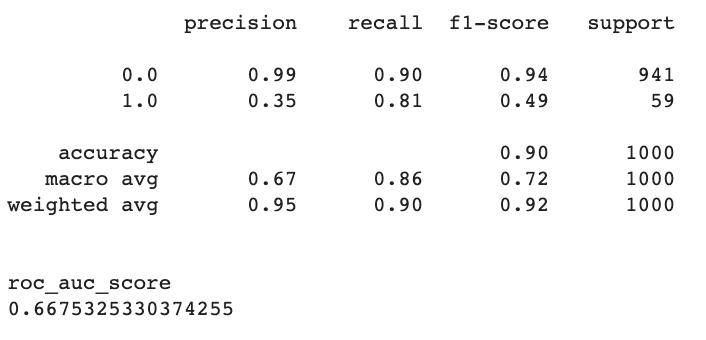

For training dataset, i found precision of 100% and recall of 91% and f1-score of 95% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 46% and recall of 95% and f1-score of 62%. Accuracy is 92% and average percision, recall & f1_score are 73%, 93% and 79% respectively with a roc auc score of 72%.

No improvement or decreament every score is constant as earlier.

For testing dataset, i found precision of 99% and recall of 90% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 35% and recall of 81% and f1-score of 49%. Accuracy is 90% and average percision, recall & f1_score are 67%, 86% and 72% respectively with a roc auc score of 66%.

Quite improvemnt in recall, f1 score as well as average recall & f1 score by 1%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with both Recall and Precision and which describes both is F1 Score.

To reduce false negative recall is important and to reduce false positives precision is important. Where both are important to be minimized, f1_score is being considered. False Positive is defined as the model predicted that the customer will churn but the customer didn't churn. But according to our model it will churn so, there would be quite chance of his churning not for immediate but after some times. So, for those type of customers we can send them some beneficial modified offers to retain them. Again false negative defines as model will predict that the customer won't churn but the customer really churned. That will be an issue for us. So, for that case we have to minimize the false negative. and false positive we must improve the score of both precision as well as recall which should direclt affect the f1_score positively. So, in our case recall will stand the higher but precision can't be neglected. so, ***recall should be higher and f1_score should be moderate.***

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized. first of all I need accuracy for the churn prediction and time isn't a constrain here, beacuse the data is not lke swiggy or ola which booking needs to be faster. Thus, for greater accuracy we used kernel SVM, Random Forest, XgBoost kind of ensembel r=techniques. So, I tried both Random Forest and XGBoost. Here is their ealuation metrics and I would like to compare.

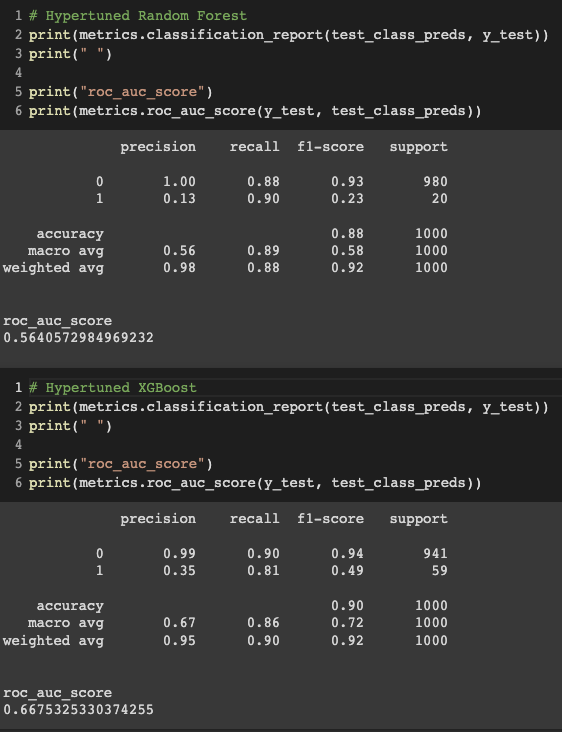

From the above snap shot, we can clearly see that for XGBoost has a improved score of f1_score over random forest. the accuracy and roc auc score is also improved for xg boost. The recall might be high in random forest but when it comes to precision and f1_score for True Churn Data scores, it's very low and even in averge scores of precision and f1_score is too low. In case of xgboost it's higher than that of random forest.

So, I have chosen XGBoost as the final prdiction model which should be deployed for real user interaction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Get shap values
explainer = shap.Explainer(xg_models)
shap_values = explainer(X_test)

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

To better understand this, let’s dive into our first SHAP plot. Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.

Looking at the x-axis, we can see the base value is E[f(x)] = -1.94. This is the average predicted number of rings across all 2967 abalones. The ending value is f(x) = -0.396. This is the predicted churn type for this abalone. The SHAP values are all the values in between. For example, the international plan  increased the predicted class of churn type by 1.03 when compared to the Account Length.

There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases res will compress. you can see we start at the same base value of -1.94.

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

Waterfall and force plots are great for interpreting individual predictions. To understand how our model makes predictions in general we need to aggregate the SHAP values. One way to do this is using a decision plot. Above we have the code used to output the decision plot for the first 10 abalones.

we can see there are 10 lines in the plot —one for each abalone. They all start at the same base value of -1.94 and end at their final predicted number of rings. As you move up from each feature on the y-axis, the movement on the x-axis is given by the SHAP value for that feature. Ultimately, this gives you similar information to a waterfall plot except we can now see it for multiple observations.

With only 10 observations, we can already see some trends. For example, some of the lines seem to zig-zag at the top of the chart. For these observations, the shucked weight increases the prediction (i.e. positive SHAP) and the shell weight and whole weight decrease the prediction (i.e. negative SHAP). In other words, these features have opposite effects on the prediction. When we look at plot 5 — beeswarm, we will see that this is the case for the model in general.

An issue with this chart is that we can’t use it to visualise all the SHAP values at once. As you increase the number of observations it will become too cluttered and it will be difficult to gain any understanding of how the model works. We are limited to interpreting the SHAP values for a handful of observations.

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

Another way to aggregate the values is using a mean SHAP plot. For each feature, we calculate the mean of the absolute SHAP values across all observations. We take the absolute values as we do not want positive and negative values to offset each other. In the end, we have the bar plot above. There is one bar for each feature and we can see that shell weight had the largest mean SHAP out of all the features.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions. In this sense, this plot can be used in the same way as a feature importance plot. That is to highlight features that are important to a model’s predictions. An issue is that it does not tell us anything about the nature of the relationship between features and the target variable.



In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Our final aggregation is the beeswarm plot. As seen in Figure, this is a plot of all the SHAP values. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature (i.e. higher feature values are redder). The features are ordered by the mean SHAP values.

This plot addresses some of the issues in the previous plots. Unlike the decision plot, we can plot all the observations and still have clear interpretations. Like mean SHAP, it can be used to highlight important relationships. We can also start to understand the nature of these relationships. For example, for Day_1call_duration notice how as the feature value increases the SHAP values increase.


# **Data Preprocessing Blog**


https://medium.com/almabetter/data-preprocessing-ea09fac6a7f7

# **Conclusion**

1. Here are some solution to Reduce Customer Churn

* Modify International Plan as the charge is same as normal one.
* Be proactive with communication.
* Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problem in the most churning states.
* Lean into best customers.
* Regular Server Maintenance.
* Solving Poor Network Connectivity Issue.
* Define a roadmap for new customers.
* Analyze churn when it happens.
* Stay competitive.

2. The four charge fields are linear functions of the minute fields.

3. The area code field and/or the state field are anomalous, and can be omitted.

4. Customers with the International Plan tend to churn more frequently.

5. Customers with four or more customer service calls churn more than four times as often as do the other customers.

6. Customers with high day minutes and evening minutes tend to churn at a higher rate than do the other customers.

7. There is no obvious association of churn with the variables day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.

8. We can deploy the model with XGBoost algorithm. Because For training dataset, i found precision of 100% and recall of 91% and f1-score of 95% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 46% and recall of 95% and f1-score of 62%. Accuracy is 92% and average percision, recall & f1_score are 73%, 93% and 79% respectively with a roc auc score of 72%. For testing dataset, i found precision of 99% and recall of 90% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 35% and recall of 81% and f1-score of 49%. Accuracy is 90% and average percision, recall & f1_score are 67%, 86% and 72% respectively with a roc auc score of 66%. It's the best performing model i found.

9. No overfitting is seen.

10. Due to less no. of data in the dataset, the scores are around 80%. Once we get more data we can retrain our algorithm for better performance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***